In [1]:
import numpy as np
import pandas as pd
import matplotlib
# Ensure text is saved as text, not outlines
matplotlib.rcParams['pdf.fonttype'] = 42   # TrueType fonts
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import altair as alt
from scipy.stats import rankdata, pearsonr, spearmanr

# Figure 2 and Supplementary Figures 3-4

In [87]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 2a')

In [88]:
with_reclustering = [
    'metabat_FALSE', 
    'metadecoder_FALSE', 
    'comebin_FALSE', 
    'comebin_single_FALSE', 
    'semibin_TRUE', 
    'AVAMB_TRUE', 
    'default_vamb_TRUE', 
    'run_taxvamb_gtdb_w_unknown_TRUE', 
    'metabuli_taxvamb_default_TRUE', 
    'kraken_taxvamb_default_TRUE', 
    'run_taxvamb_centrifuge_TRUE', 
]

label_map = {
    'metabat_FALSE': 'Metabat', 
    'metadecoder_FALSE': 'Metadecoder', 
    'comebin_FALSE': 'Comebin', 
    'comebin_single_FALSE': 'Comebin (Single)', 
    'semibin_TRUE': 'SemiBin', 
    'AVAMB_TRUE': 'AVAMB', 
    'default_vamb_TRUE': 'VAMB', 
    'run_taxvamb_gtdb_w_unknown_TRUE': 'TaxVAMB (MMSeqs2)', 
    'metabuli_taxvamb_default_TRUE': 'TaxVAMB (Metabuli)', 
    'kraken_taxvamb_default_TRUE': 'TaxVAMB (Kraken2)', 
    'run_taxvamb_centrifuge_TRUE': 'TaxVAMB (Centrifuge)', 
}

label_map_values = [
    'Metabat', 
    'Metadecoder', 
    'Comebin', 
    'Comebin (Single)', 
    'SemiBin', 
    'AVAMB', 
    'VAMB', 
    'TaxVAMB (MMSeqs2)', 
    'TaxVAMB (Metabuli)', 
    'TaxVAMB (Kraken2)', 
    'TaxVAMB (Centrifuge)', 
]

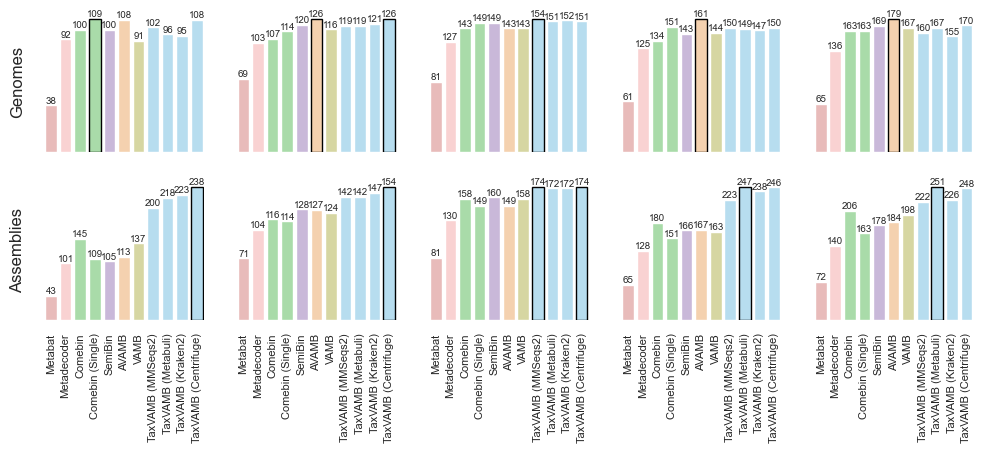

In [89]:
sns.set_theme(style="whitegrid")

df_final = df[df['Tool_reclustering'].isin(with_reclustering)].copy()
df_final['labels'] = df_final['Tool_reclustering'].map(label_map)
df_final['Dataset'] = df_final['sample']

f, axs = plt.subplots(2, 5, figsize=(12, 4), sharex=True, sharey=False)

taxvamb_colors = ['#ade1f9']*4
colors = ['#f0b3b2', '#ffcccc', '#a1e3a1', '#a1e3a1', '#c9b3de', '#ffd1a4', '#dedf99'] + taxvamb_colors

map_labels = {
    False: 'Genomes',
    True: 'Assemblies',
}

for j, s in enumerate(['Airways', 'Urogenital', 'Gastrointestinal', 'Skin', 'Oral']):
    df_s = df_final[df_final['Dataset'] == s]
    sns.set_color_codes("pastel")
    sns.despine(left=True, bottom=True)
    for i, Y in enumerate([False, True]):
        if Y:
            df_sk = df_s[df_s['ASSEMBLY']]
        else:
            df_sk = df_s[~df_s['ASSEMBLY']]
        
        ax = axs[i][j]
        g = sns.barplot(
            x="labels", 
            y='BINS_2kbp', 
            data=df_sk, 
            hue='labels', 
            palette=colors, 
            orient='v', 
            hue_order=label_map_values, 
            order=label_map_values, 
            ax=ax, 
            legend=False,
        )

        heights = []
        for bars in ax.containers:
            ax.bar_label(bars, label_type='edge', size=7)
            for _, bar in enumerate(bars):
                heights.append(bar.get_height())

        if not np.all(np.isnan(np.array(heights))):
            tallest = np.max(np.array(heights))
            for i, height in enumerate(heights):
                if height == tallest:
                    ax.containers[i].patches[0].set_edgecolor('black')
                
        ax.set_xlabel('')
        if j != 0:
            ax.set_ylabel('')
        else:
            ax.set_ylabel(map_labels[Y], fontsize=12)
        if i == 0:
            ax.set_title(s, fontsize=10)
        ax.grid(False)

    
for j in range(10):
    ax = axs.flat[j]
    ax.tick_params(axis='x', rotation=90)
    ax.set_yticklabels([])
    ax.set_xticks(list(range(len(label_map_values))))
    ax.set_xticklabels(label_map_values, size=8)


plt.savefig(f'../figures/figure2a_supfigure3_4.pdf', bbox_inches = 'tight')
plt.show()

# Figure 2b

In [97]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 2b')

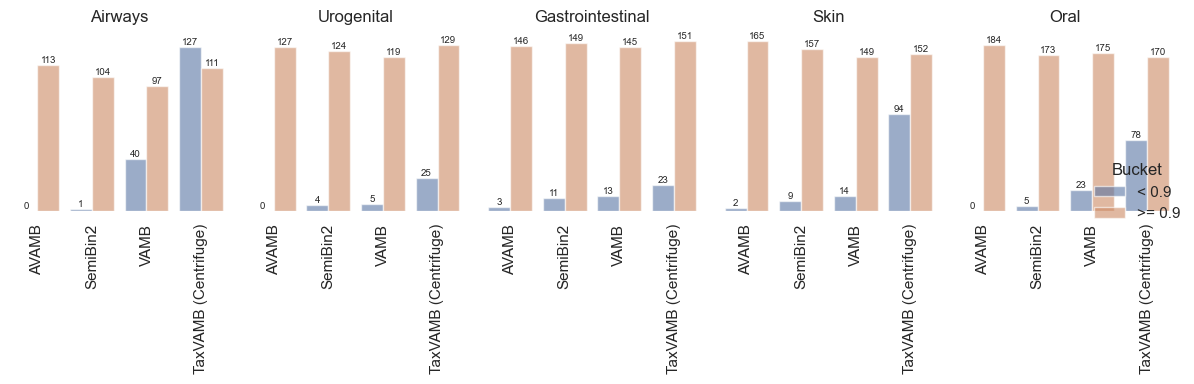

In [98]:
sns.set_theme(style="whitegrid")

df_final = df.copy()
dataset_order = ['Airways', 'Urogenital', 'Gastrointestinal', 'Skin', 'Oral']

g = sns.catplot(
    data=df_final,
    kind="bar",
    x="Model", y="NC_asms",
    hue="Bucket",
    col="Dataset", col_order=dataset_order,
    col_wrap=len(dataset_order),     # one row
    height=3, aspect=1,              # same visual style
    dodge=True, errorbar=None, alpha=.6,
    sharex=True, sharey=False
)

g.figure.set_size_inches(12, 4)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "")
g.set_xticklabels(rotation=90)
g.set_yticklabels([])
g.despine(left=True, bottom=True)

# add bar labels per facet
for ax in g.axes.flatten():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge', size=7)
    ax.grid(False)

g.figure.tight_layout()
g.figure.savefig("../figures/figure2b_row.pdf", bbox_inches="tight")
plt.show()

# Figure 2c

In [194]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 2a')

In [195]:
map_reclustering_labels = [
    'semibin_TRUE', 
    'default_vamb_TRUE', 
    'metabuli_taxvamb_default_TRUE', 
    'run_taxvamb_centrifuge_TRUE', 
]

map_prereclustering_labels = [
    'semibin_FALSE', 
    'vamb_default_FALSE', 
    'metabuli_taxvamb_default_FALSE', 
    'centrifuge_taxvamb_FALSE', 
]

map_labels_model = {
    'semibin_TRUE': 'SemiBin', 
    'semibin_FALSE': 'SemiBin', 
    
    'default_vamb_TRUE': 'VAMB', 
    'vamb_default_FALSE': 'VAMB', 
    
    'metabuli_taxvamb_default_TRUE': 'TaxVAMB (Metabuli)', 
    'metabuli_taxvamb_default_FALSE': 'TaxVAMB (Metabuli)', 

    'run_taxvamb_centrifuge_TRUE': 'TaxVAMB (Centrifuge)', 
    'centrifuge_taxvamb_FALSE': 'TaxVAMB (Centrifuge)', 
}
order_labels = [
    'SemiBin', 'VAMB', 'TaxVAMB (Metabuli)', 
    'TaxVAMB (Centrifuge)'
]

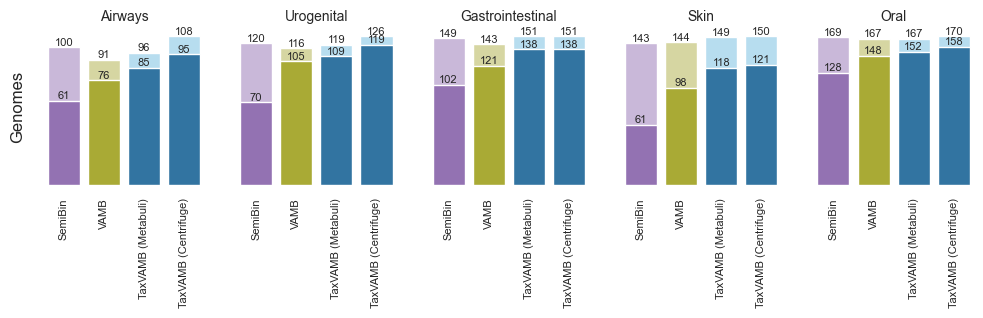

In [196]:
sns.set_theme(style="whitegrid")

df_r = df[df['Tool_reclustering'].isin(map_reclustering_labels + map_prereclustering_labels)].copy()
df_r = df_r[~df_r['ASSEMBLY']]

map_recluster = {k: 'After reclustering' for k in map_reclustering_labels}
map_recluster.update({k: 'Before reclustering' for k in map_prereclustering_labels})

df_r['fig_recluster'] = df_r['Tool_reclustering'].map(map_recluster)
df_r['fig_names'] = df_r['Tool_reclustering'].map(map_labels_model)


f, axs = plt.subplots(1, 5, figsize=(12, 2), sharex=True, sharey=False)
f.subplots_adjust(bottom=0.1)


taxvamb_colors = ['#ade1f9']
taxvamb_dark_colors = ['#1f77b4']

light_colors = ['#c9b3de', '#dedf99'] + taxvamb_colors + taxvamb_colors
dark_colors = ['#9467bd', '#bcbd22'] + taxvamb_dark_colors + taxvamb_dark_colors


for j, s in enumerate(['Airways', 'Urogenital', 'Gastrointestinal', 'Skin', 'Oral']):
    df_s = df_r[df_r['sample'] == s]
    ax = axs[j]
    
    df_after = df_s[df_s['fig_recluster'] == 'After reclustering']
    g = sns.barplot(x="fig_names", y='BINS_2kbp', hue='fig_names', data=df_after, palette=light_colors, orient='v', hue_order=order_labels, order=order_labels, label='After reclustering', ax=ax)

    df_before = df_s[df_s['fig_recluster'] == 'Before reclustering']
    sns.barplot(x="fig_names", y='BINS_2kbp', hue='fig_names', data=df_before, palette=dark_colors, orient='v', hue_order=order_labels, order=order_labels, label='Before reclustering', ax=ax)

    for bars in ax.containers:
        ax.bar_label(bars, label_type='edge', size=8)

    ax.set_xlabel('')
    ax.set_ylabel('Genomes', fontsize=12)
    ax.set_title(s, fontsize=10)
    ax.grid(False)

    sns.despine(left=True, bottom=True)
    
for j in range(5):
    if j > 0:
        axs[j].set_ylabel('')
    axs[j].tick_params(axis='x', rotation=90)
    axs[j].set_yticklabels([])
    ax.set_xticks(list(range(len(order_labels))))
    axs[j].set_xticklabels(order_labels, size=8)
    

plt.savefig(f'../figures/figure2c.pdf', bbox_inches = 'tight')
plt.show()

# Figure 3b

In [188]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 3a')
df = df[~(df['vamb_based_tool'] & (df['no_predictor']))]
df.loc[~df['vamb_based_tool'], 'vamb_is_with_reclustering'] = True

In [189]:
df_bio = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 3b')

In [190]:
df_gunc = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 5-6')

In [191]:
map_gunc = {}
for d, df_d in df_gunc.groupby('Dataset'):
    map_gunc[d] = {'HQ_GUNC': dict(zip(df_d['Method'], df_d['HQ_GUNC'].astype(int))), 'MQ_GUNC': dict(zip(df_d['Method'], df_d['MQ_GUNC'].astype(int)))}

In [192]:
tool_label_map = {
    'comebin': 'Comebin',
    'default_vamb': 'VAMB',
    'semibin': 'SemiBin2',
    'metabat': 'Metabat',
    'metadecoder': 'Metadecoder',
    'run_taxvamb_gtdb_w_unknown': 'TaxVAMB',
}

dataset_label_map = {
    'PRJNA638805': 'Black Sea',
    'PRJNA1003562': 'Apple Tree',
    'PRJNA783873': 'Forest Soil',
    'bee_metagenome_PRJNA1007366': 'Bee Hives',
    'vag_infert_PRJNA1078345': 'Vaginal',
    'human_saliva_oral_PRJDB16210': 'Saliva',
    'gut': 'Human gut (Fecal Transplant)',
    'data_ar': 'Human gut (Antibiotic Uptake)',
    'erda': 'Human gut (IBS)',
}

/var/folders/5b/1dk8bnws25l6w502hfdc8xw80000gn/T/ipykernel_74958/2613917239.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hq["Count"] = df_hq['fig_names'].map(map_gunc[s]['HQ_GUNC'])
/var/folders/5b/1dk8bnws25l6w502hfdc8xw80000gn/T/ipykernel_74958/2613917239.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hq["Count"] = df_hq['fig_names'].map(map_gunc[s]['HQ_GUNC'])
/var/folders/5b/1dk8bnws25l6w502hfdc8xw80000gn/T/ipykernel_74958/2613917239.py:83: SettingWithCopyWarning: 
A value is trying 

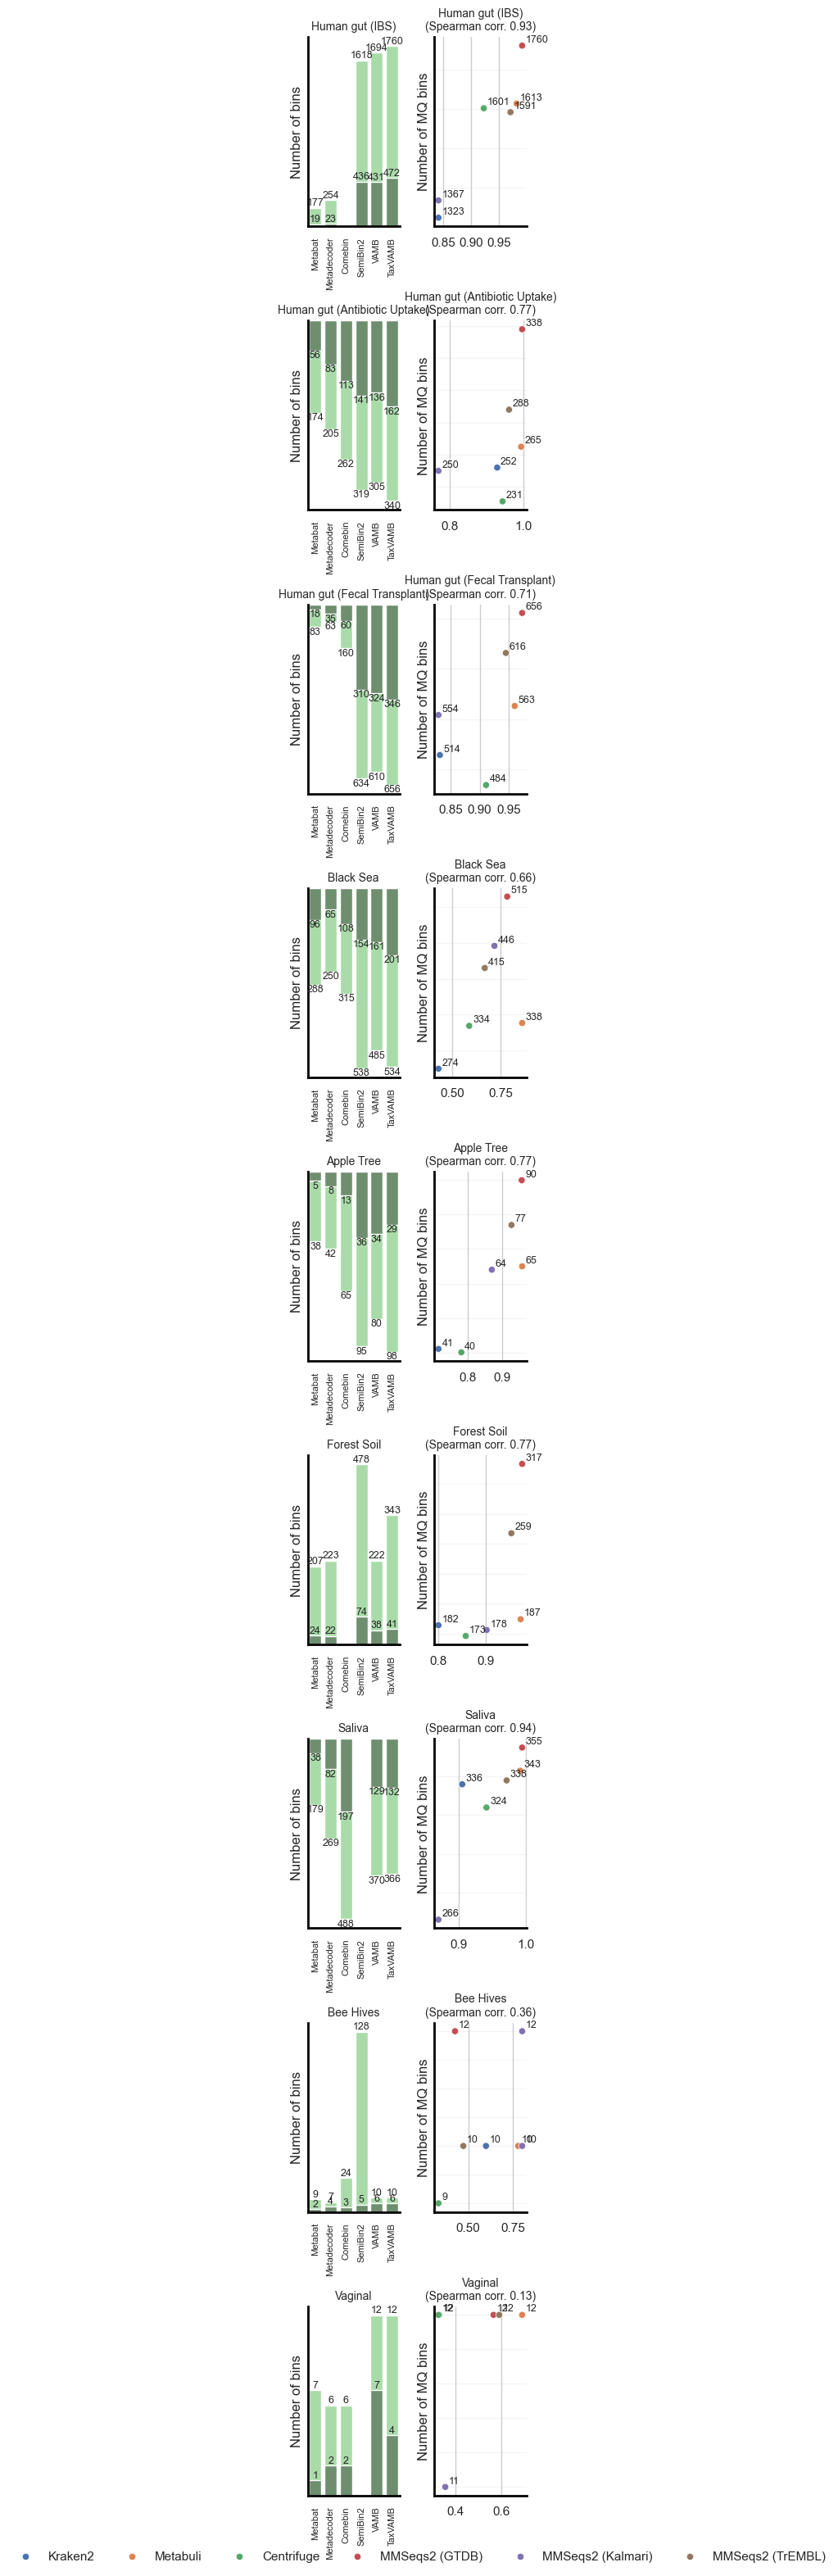

In [193]:
df['ToolLabel'] = df['tool'].map(tool_label_map)
df['DatasetLabel'] = df['Sample'].map(dataset_label_map)

hq_column = 'HQ_bins'
mq_column = 'MQ_bins'

# --- Bars data (long) ---
df_m = df.melt(
    id_vars=["ToolLabel", "DatasetLabel", "vamb_is_with_reclustering"],
    value_vars=[hq_column, mq_column],
    var_name="Quality",
    value_name="Count"
).rename(columns={"ToolLabel": "fig_names", "DatasetLabel": "Dataset"})
df_m["Quality"] = df_m["Quality"].map({hq_column: "High Quality", mq_column: "Medium Quality"})
df_m["Reclustering"] = df_m["vamb_is_with_reclustering"]


# --- Orderings ---
datasets = ['Human gut (IBS)', 'Human gut (Antibiotic Uptake)', 'Human gut (Fecal Transplant)', 'Black Sea', 'Apple Tree', 'Forest Soil', 'Saliva', 'Bee Hives', 'Vaginal']
order_labels = ['Metabat', 'Metadecoder', 'Comebin', 'SemiBin2', 'VAMB', 'TaxVAMB']
df_m["fig_names"] = pd.Categorical(df_m["fig_names"], categories=order_labels, ordered=True)

# --- Colors per tool (light/dark) ---
light_colors = ['#a1e3a1', '#a1e3a1', '#a1e3a1', '#a1e3a1', '#a1e3a1', '#a1e3a1']
dark_colors  = ['#699469', '#699469', '#699469', '#699469', '#699469', '#699469']  # darker versions

# light_colors = ['#f0b3b2', '#ffcccc', '#a1e3a1', '#c9b3de', '#dedf99', '#ade1f9']
# dark_colors  = ['#9c7474', '#a68585', '#699469', '#837490', '#909163', '#7092a2']  # darker versions

def ensure_len(pal, n):
    if len(pal) >= n: return pal[:n]
    times = (n + len(pal) - 1) // len(pal)
    return (pal * times)[:n]

light_colors = ensure_len(light_colors, len(order_labels))
dark_colors  = ensure_len(dark_colors,  len(order_labels))

# --- Figure (rows = datasets, 2 cols: bars | scatter) ---
n_rows = len(datasets)
fig, axs = plt.subplots(
    n_rows, 2,
    figsize=(3.5, 3.5 * n_rows),
    gridspec_kw={'width_ratios': [1.1, 1.1]},
    sharex=False, sharey=False
)

# Ensure axs is 2D even if n_rows == 1
if n_rows == 1:
    axs = axs.reshape(1, 2)

scatter_legend_handles = scatter_legend_labels = None

for j, s in enumerate(datasets):
    
    bar_ax   = axs[j, 0]
    scat_ax  = axs[j, 1]

    # ----- Left: Bars (overlay Medium vs High per tool) -----
    df_s = df_m[(df_m["Dataset"] == s) & df_m["Reclustering"]]

    # Medium Quality (background, lighter)
    df_mq = df_s[df_s["Quality"] == "Medium Quality"]
    # df_mq["Count"] = df_mq['fig_names'].map(map_gunc[s]['MQ_GUNC'])

    if not df_mq.empty:
        sns.barplot(
            data=df_mq,
            x="fig_names", y="Count",
            order=order_labels,
            hue="fig_names", hue_order=order_labels,
            palette=light_colors,
            dodge=False,
            ax=bar_ax
        )
        # make them slightly transparent so dark bars are readable
        for p in bar_ax.patches[-len(order_labels):]:
            p.set_alpha(0.45)
        if bar_ax.legend_:
            bar_ax.legend_.remove()

    # High Quality (foreground, darker)
    df_hq = df_s[df_s["Quality"] == "High Quality"]
    df_hq["Count"] = df_hq['fig_names'].map(map_gunc[s]['HQ_GUNC'])
    
    if not df_hq.empty:
        sns.barplot(
            data=df_hq,
            x="fig_names", y="Count",
            order=order_labels,
            hue="fig_names", hue_order=order_labels,
            palette=dark_colors,
            dodge=False,
            ax=bar_ax
        )
        if bar_ax.legend_:
            bar_ax.legend_.remove()

    # Baseline (non-reclustered) rows just for VAMB/TaxVAMB
    baseline = df_m[
        (df_m["Dataset"] == s) &
        ~df_m["Reclustering"] &
        (df_m["fig_names"].isin(["VAMB", "TaxVAMB"]))
    ]
    # xmap = {tool: i for i, tool in enumerate(order_labels)}
    # Draw dotted lines per tool & quality (use matching light/dark shades)
    # for tool in ["VAMB", "TaxVAMB"]:
    #     if tool not in xmap:
    #         continue
    #     xcenter = xmap[tool]
    #     halfwidth = 0.4  # span roughly the bar width

        # MQ line (lighter, dotted)
        # val_mq = baseline.loc[
        #     (baseline["fig_names"] == tool) & (baseline["Quality"] == "Medium Quality"),
        #     "Count"
        # ]
        # if not val_mq.empty and pd.notna(val_mq.iloc[0]):
        #     bar_ax.hlines(val_mq.iloc[0], xcenter - halfwidth, xcenter + halfwidth, linewidth=1,
        #                   color='#636363')
        #     bar_ax.text(
        #         xcenter, val_mq.iloc[0] - (0.03 * bar_ax.get_ylim()[1]),  # slightly below the line
        #         f"{int(val_mq.iloc[0])}",
        #         ha='center', va='top', fontsize=9, color='#636363'
        #     )
    
    # Bar labels
    for container in bar_ax.containers:
        bar_ax.bar_label(container, label_type='edge', size=9)

    # Ax cosmetics — avoid set_xticklabels() to kill the warning
    bar_ax.set_xlabel('')
    bar_ax.set_ylabel('Number of bins')
    bar_ax.set_title(s, fontsize=10)          # <-- single title per row (on left plot only)
    bar_ax.tick_params(axis='x', labelrotation=90, labelsize=8)
    
    # --- REMOVE y-ticks and add fat black axis lines ---
    bar_ax.tick_params(axis='y', left=False, labelleft=False)  # remove y ticks
    for spine in ['bottom', 'left']:
        bar_ax.spines[spine].set_linewidth(2.0)
        bar_ax.spines[spine].set_color('black')
    for spine in ['top', 'right']:
        bar_ax.spines[spine].set_visible(False)

    bar_ax.grid(False)


    # ----- Right: Scatter (per dataset) -----
    dfb = df_bio[df_bio['sample'] == s]
    if dfb.empty:
        scat_ax.set_title("")                  # no second title
        # scat_ax.axis("off")
    else:
        sp = sns.scatterplot(
            data=dfb,
            x="Top_Level_Recall",
            y=mq_column,
            hue="tool",
            ax=snat_ax if False else scat_ax  # guard against typos; keep as scat_ax
        )
        # capture legend from the first non-empty scatter
        if scatter_legend_handles is None:
            scatter_legend_handles, scatter_legend_labels = sp.get_legend_handles_labels()
        if scat_ax.legend_:
            scat_ax.legend_.remove()

        # Label each point with the number of bins (MQ_bins)
        for _, r in dfb.iterrows():
            scat_ax.annotate(
                text=str(int(r[mq_column])) if pd.notna(r[mq_column]) else "",
                xy=(r["Top_Level_Recall"], r[mq_column]),
                xytext=(3, 3),
                textcoords="offset points",
                fontsize=9
            )

        scat_ax.set_xlabel(f"")
        scat_ax.set_ylabel('Number of MQ bins')
        scat_ax.set_title(f"{s}\n(Spearman corr. {spearmanr(dfb['Top_Level_Recall'], dfb[mq_column])[0]:.2f})", fontsize=10)
        scat_ax.grid(True, axis='y', alpha=0.2)

        # --- REMOVE y-ticks and add fat black axis lines ---
        scat_ax.tick_params(axis='y', left=False, labelleft=False)
        for spine in ['bottom', 'left']:
            scat_ax.spines[spine].set_linewidth(2.0)
            scat_ax.spines[spine].set_color('black')
        for spine in ['top', 'right']:
            scat_ax.spines[spine].set_visible(False)


# Add one shared legend for scatter on the bottom (if we saw any points)
if scatter_legend_handles:
    fig.legend(
        scatter_legend_handles, scatter_legend_labels,
        loc="lower center", ncol=min(len(scatter_legend_labels), 6),
        bbox_to_anchor=(0.5, 0.0), frameon=False
    )
    plt.subplots_adjust(bottom=0.08)

plt.tight_layout()
plt.savefig('../figures/figure3.pdf', bbox_inches='tight')
plt.show()


# Figure 4a

In [99]:
df_long = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 4a')

In [100]:
label_order = [
    'Metadecoder', 
    'Metabat', 
    'Comebin', 
    'Comebin (Single)', 
    'SemiBin2', 
    'VAMB', 
    'VAMB (reclustered with k-means)',
    'TaxVAMB + MMSeqs', 
    'TaxVAMB + MMSeqs (reclustered with k-means)',
]

groups = [
    'Metadecoder', 
    'Metabat', 
    'Comebin', 
    'Comebin (Single)', 
    'SemiBin', 
    'VAMB', 
    'VAMB',
    'TaxVAMB', 
    'TaxVAMB',
]

label_order_gaps = [
    'Metadecoder', 
    'Metabat', 
    'Comebin', 
    'Comebin (Single)', 
    'SemiBin', 
    '',
    'VAMB', 
    'VAMB (reclustered with k-means)',
    'TaxVAMB + MMSeqs', 
    'TaxVAMB + MMSeqs (reclustered with k-means)',
]

map_group = {k: v for k, v in zip(label_order, groups)}

/var/folders/5b/1dk8bnws25l6w502hfdc8xw80000gn/T/ipykernel_74958/2619793894.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(label_order_gaps, size=8)
/var/folders/5b/1dk8bnws25l6w502hfdc8xw80000gn/T/ipykernel_74958/2619793894.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(label_order_gaps, size=8)
/var/folders/5b/1dk8bnws25l6w502hfdc8xw80000gn/T/ipykernel_74958/2619793894.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(label_order_gaps, size=8)
/var/folders/5b/1dk8bnws25l6w502hfdc8xw80000gn/T/ipykernel_74958/2619793894.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xt

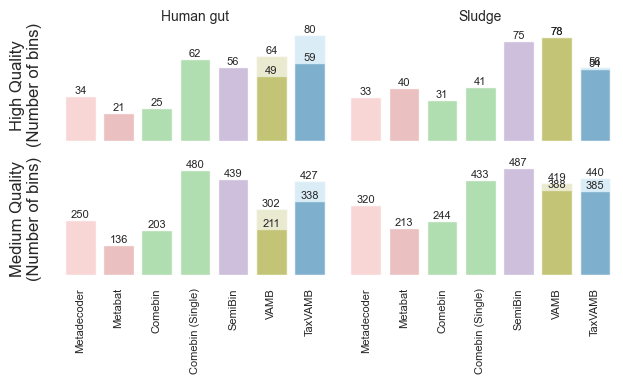

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="whitegrid")

# --- Config from you ---
label_order = [
    'Metadecoder', 
    'Metabat', 
    'Comebin', 
    'Comebin (Single)', 
    'SemiBin2', 
    'VAMB', 
    'VAMB (reclustered with k-means)',
    'TaxVAMB + MMSeqs', 
    'TaxVAMB + MMSeqs (reclustered with k-means)',
]
groups = [
    'Metadecoder', 
    'Metabat', 
    'Comebin', 
    'Comebin (Single)', 
    'SemiBin', 
    'VAMB', 
    'VAMB',
    'TaxVAMB', 
    'TaxVAMB',
]
label_order_gaps = [
    'Metadecoder', 
    'Metabat', 
    'Comebin', 
    'Comebin (Single)', 
    'SemiBin', 
    'VAMB', 
    'TaxVAMB',
]

# Map each Method -> Base (collapse clustered & reclustered to same x slot)
map_base = dict(zip(label_order, groups))

# Keep only the methods we care about
df_plot = df_long[df_long['Method'].isin(label_order)].copy()

# Base x category + recluster flag
df_plot['Base'] = df_plot['Method'].map(map_base)
df_plot['Base'] = pd.Categorical(df_plot['Base'], categories=label_order_gaps, ordered=True)
df_plot['Recluster'] = df_plot['Method'].str.contains('(reclustered', regex=False)\
                        .map({True: 'After reclustering', False: 'Before reclustering'})

# Colors per Method (light for before, dark for after)
palette_before = {
    'Metadecoder': '#ffcccc',
    'Metabat': '#f0b3b2',
    'Comebin': '#a1e3a1',
    'Comebin (Single)': '#a1e3a1',
    'SemiBin2': '#c9b3de',
    'VAMB': '#bcbd22',
    'TaxVAMB + MMSeqs': '#1f77b4',
}
palette_after = {
    'VAMB (reclustered with k-means)': '#dedf99',
    'TaxVAMB + MMSeqs (reclustered with k-means)': '#ade1f9',
}

datasets = ['Human gut', 'Sludge']          # adjust if needed
qualities = [('High Quality', 'HQ'), ('Medium Quality', 'MQ')]

# 2 (HQ/MQ) x N_datasets
f, axs = plt.subplots(2, len(datasets), figsize=(3.2 * len(datasets), 4), sharex=True, sharey='row')
if len(datasets) == 1:
    axs = axs.reshape(2, 1)

for col_idx, ds in enumerate(datasets):
    df_ds = df_plot[df_plot['Dataset'] == ds]

    for row_idx, (qlabel, ycol) in enumerate(qualities):
        ax = axs[row_idx, col_idx]
        df_q = df_ds.copy()

        # --- BEFORE (light, semi-transparent) ---
        df_before = df_q[df_q['Recluster'] == 'Before reclustering']
        if not df_before.empty:
            sns.barplot(
                data=df_before, x='Base', y=ycol,
                order=label_order_gaps,
                hue='Method', hue_order=[m for m in label_order if m in df_before['Method'].unique()],
                palette={k: v for k, v in palette_before.items() if k in df_before['Method'].unique()},
                dodge=False, ax=ax, alpha=0.9
            )
            if ax.legend_:
                ax.legend_.remove()

        # --- AFTER (dark, solid) ---
        df_after = df_q[df_q['Recluster'] == 'After reclustering']
        if not df_after.empty:
            sns.barplot(
                data=df_after, x='Base', y=ycol,
                order=label_order_gaps,
                hue='Method', hue_order=[m for m in label_order if m in df_after['Method'].unique()],
                palette={k: v for k, v in palette_after.items() if k in df_after['Method'].unique()},
                dodge=False, ax=ax, alpha=0.5
            )
            if ax.legend_:
                ax.legend_.remove()

        # Labels and styling
        for container in ax.containers:
            ax.bar_label(container, label_type='edge', size=8)

        if row_idx == 0:
            ax.set_title(ds, fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel(f'{qlabel}\n(Number of bins)' if col_idx == 0 else '')
        ax.tick_params(axis='x', rotation=90)
        # ax.set_xticks([p + width for i in enumerate(label_order_gaps)])
        ax.set_xticklabels(label_order_gaps, size=8)
        ax.grid(False)
        sns.despine(ax=ax, left=True, bottom=True)

# Hide y tick labels on non-left columns
for col_idx in range(1, len(datasets)):
    axs[0, col_idx].set_yticklabels([])
    axs[1, col_idx].set_yticklabels([])

plt.tight_layout()
plt.savefig('../figures/figure4a_overlapped_reclustered.pdf', bbox_inches='tight')
plt.show()


# Figure 4b

In [83]:
df_longread_simple = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 4b')

In [84]:
# Taxonomic ranks to count
RANKS = ["Species", "Genus", "Family", "Order", "Class", "Phylum"]

# Colors for consistency
METHOD_COLORS = {
    "VAMB": "#a2b86c",
    "TaxVAMB": "#84c7e4",
}

In [85]:
for dataset in df_longread_simple["Dataset"].unique():
    df_sub = df_longread_simple[df_longread_simple["Dataset"] == dataset]

    fig, ax = plt.subplots(figsize=(6, 3))
    x = range(len(RANKS))
    width = 0.25

    for i, method in enumerate(["TaxVAMB", "VAMB"]):
        vals = [df_sub[df_sub["Method"] == method][r].values[0] for r in RANKS]
        ax.bar(
            [p + i*width for p in x],
            vals,
            width=width,
            label=method,
            color=METHOD_COLORS[method],
        )

    ax.set_xticks([p + width for p in x])
    ax.set_xticklabels(RANKS, rotation=45)
    ax.set_ylabel("Unique taxa")
    ax.set_title(dataset)
    ax.legend()

    plt.tight_layout()
    plt.savefig(f"../figures/supfigure4b_unique_taxa_{dataset.replace(' ', '_')}.pdf", dpi=300)
    plt.close()

# Figure 5b

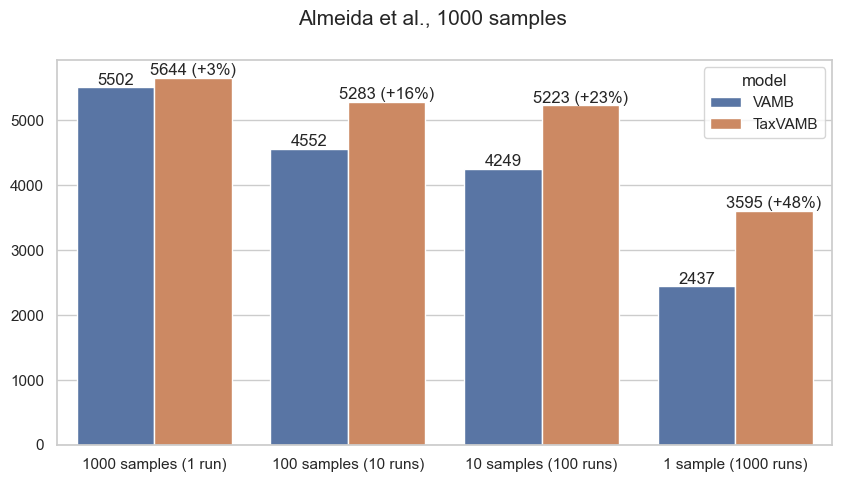

In [868]:
values_dict_simple = {
    'Almeida et al.': {
        'VAMB': {
            '1000 samples (1 run)': 5502, 
            '100 samples (10 runs)': 4552, 
            '10 samples (100 runs)': 4249,
            '1 sample (1000 runs)': 2437,
        },
        'TaxVAMB': {
            '1000 samples (1 run)': 5644, 
            '100 samples (10 runs)': 5283, 
            '10 samples (100 runs)': 5223,
            '1 sample (1000 runs)': 3595,
        },
    },
}

levels_names = ['1000 samples (1 run)', '100 samples (10 runs)', '10 samples (100 runs)', '1 sample (1000 runs)']

def make_df_from_values(values_dict):
    levels = []
    models = []
    values = []
    datasets = []

    for dataset, v1 in values_dict.items():
        for model, v2 in v1.items():
            for level, value in v2.items():
                levels.append(level)
                models.append(model)
                values.append(value)
                datasets.append(dataset)

    df_longread = pd.DataFrame({
        'model': models,
        '# of NC strains': values,
        'dataset': datasets,
        'level': levels,
    })
    
    return df_longread

# df_longread_reclustered = make_df_from_values(values_dict_reclustered)
# df_longread = make_df_from_values(values_dict)
df_longread_simple = make_df_from_values(values_dict_simple)

f, axs = plt.subplots(1, 1, figsize=(10, 5))

for i, dataset in enumerate(['Almeida et al.']):
    df_s = df_longread_simple[df_longread_simple['dataset'] == dataset]
    g = sns.barplot(
        x='level', 
        y='# of NC strains', 
        hue='model',
        order=levels_names,
        data=df_s, 
        orient='v', 
        ax=axs,
    )
    
    for i, cont in enumerate(axs.containers):
        if i == 1:
            prev = axs.containers[0].datavalues
            axs.bar_label(cont, labels=[f'{v:.0f} (+{(v-prev[j])*100 / prev[j]:.0f}%)' for j, v in enumerate(cont.datavalues)], label_type='edge')
        else:
            axs.bar_label(cont, label_type='edge')
    axs.set_xlabel('')
    axs.set_ylabel('')
f.suptitle('Almeida et al., 1000 samples', fontsize=15)


plt.savefig(f'../figures/figure5b.pdf', bbox_inches = 'tight')

# Figure 5c

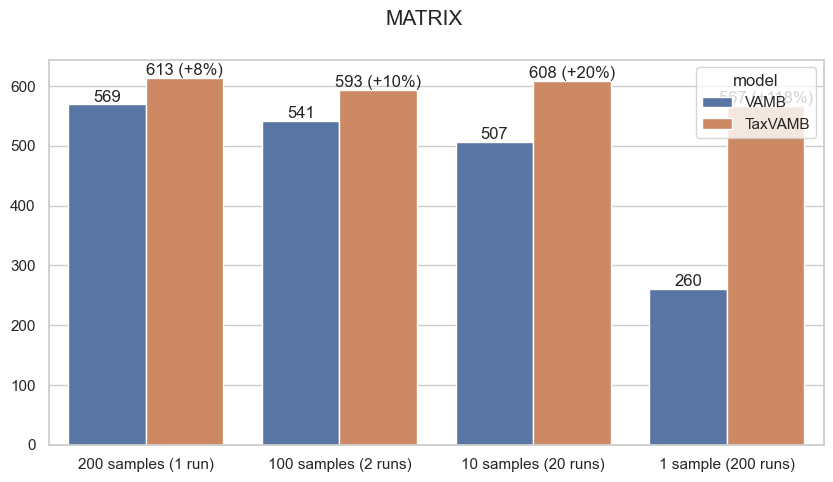

In [869]:
values_dict_simple = {
    'MATRIX': {
        'VAMB': {
            '200 samples (1 run)': 569, 
            '100 samples (2 runs)': 541, 
            '10 samples (20 runs)': 507,
            '1 sample (200 runs)': 260,
        },
        'TaxVAMB': {
            '200 samples (1 run)': 613, 
            '100 samples (2 runs)': 593, 
            '10 samples (20 runs)': 608,
            '1 sample (200 runs)': 567,
        },
    },
}

levels_names = ['200 samples (1 run)', '100 samples (2 runs)', '10 samples (20 runs)', '1 sample (200 runs)']

def make_df_from_values(values_dict):
    levels = []
    models = []
    values = []
    datasets = []

    for dataset, v1 in values_dict.items():
        for model, v2 in v1.items():
            for level, value in v2.items():
                levels.append(level)
                models.append(model)
                values.append(value)
                datasets.append(dataset)

    df_longread = pd.DataFrame({
        'model': models,
        '# of NC strains': values,
        'dataset': datasets,
        'level': levels,
    })
    
    return df_longread

# df_longread_reclustered = make_df_from_values(values_dict_reclustered)
# df_longread = make_df_from_values(values_dict)
df_longread_simple = make_df_from_values(values_dict_simple)

f, axs = plt.subplots(1, 1, figsize=(10, 5))

for i, dataset in enumerate(['MATRIX']):
    df_s = df_longread_simple[df_longread_simple['dataset'] == dataset]
    g = sns.barplot(
        x='level', 
        y='# of NC strains', 
        hue='model',
        order=levels_names,
        data=df_s, 
        orient='v', 
        ax=axs,
    )
    
    for i, cont in enumerate(axs.containers):
        if i == 1:
            prev = axs.containers[0].datavalues
            axs.bar_label(cont, labels=[f'{v:.0f} (+{(v-prev[j])*100 / prev[j]:.0f}%)' for j, v in enumerate(cont.datavalues)], label_type='edge')
        else:
            axs.bar_label(cont, label_type='edge')
    axs.set_xlabel('')
    axs.set_ylabel('')
#     axs.set_title('NC bins, comp>0.9, cont<0.05', fontsize=16)
f.suptitle('MATRIX', fontsize=15)


plt.savefig(f'../figures/figure5c.pdf', bbox_inches = 'tight')

# Figure 6b

In [873]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 6b', header=None)

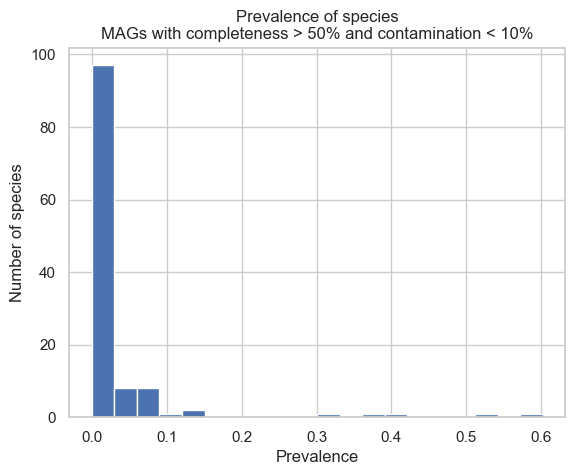

In [877]:
plt.hist(df[0], bins=20)
plt.title(f'Prevalence of species\nMAGs with completeness > 50% and contamination < 10%')
plt.xlabel('Prevalence')
plt.ylabel('Number of species')
plt.savefig('../figures/figure6b.pdf')
plt.show()


plt.show()

# Figure 6c

In [878]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 6c')

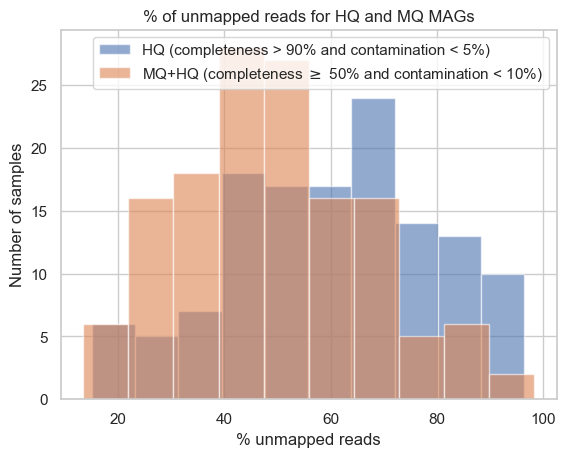

In [879]:
plt.hist(df['unmapped_reads - HQ'], label='HQ (completeness > 90% and contamination < 5%)', alpha=0.6, bins=10)
plt.hist(df['unmapped_reads - HQ+MQ'], label=r'MQ+HQ (completeness $\geq$ 50% and contamination < 10%)', alpha=0.6, bins=10)
plt.legend()
plt.title('% of unmapped reads for HQ and MQ MAGs')
plt.xlabel('% unmapped reads')
plt.ylabel('Number of samples')
plt.savefig('../figures/figure6c.pdf')
plt.show()

# Supplementary Figure S8

In [110]:
df_met = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 8')

In [890]:
with_reclustering = [
    'Metabuli', 
    'TaxVAMB', 
]

label_map = {
    'Metabuli': 'Metabuli', 
    'Metabat': 'Metabat', 
    'Metadecoder': 'Metadecoder', 
    'Comebin': 'Comebin', 
    'SemiBin (WITH reclustering)': 'SemiBin', 
    'AVAMB (reclustering)': 'AVAMB', 
    'VAMB (reclustering)': 'VAMB', 
    'MMSeqs+TaxVAMB (reclustered)': 'TaxVAMB (MMSeqs)', 
    'Metabuli+TaxVAMB (reclustered)': 'TaxVAMB (Metabuli)', 
    'Metabuli+TaxVAMB': 'TaxVAMB (Metabuli)', 
    'Kraken2+TaxVAMB (reclustered)': 'TaxVAMB (Kraken2)', 
    'Centrifuge+TaxVAMB (reclustered)': 'TaxVAMB (Centrifuge)', 
}

label_map_values = [
    'Metabuli', 
    'TaxVAMB', 
]

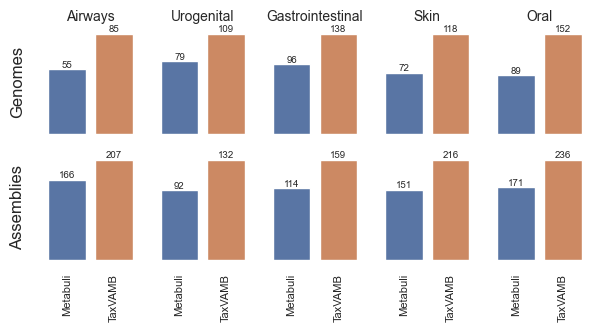

In [891]:
sns.set_theme(style="whitegrid")

df_final = df_met[df_met['Method'].isin(with_reclustering)].copy()
df_final['labels'] = df_final['Method']

f, axs = plt.subplots(2, 5, figsize=(7, 3), sharex=True, sharey=False)

taxvamb_colors = ['#ade1f9']*4
colors = ['#f0b3b2', '#ffcccc', '#a1e3a1', '#c9b3de', '#ffd1a4', '#dedf99'] + taxvamb_colors

map_labels = {
    'BB NC genomes': 'Genomes',
    'BB NC asms': 'Assemblies',
}

for j, s in enumerate(['Airways', 'Urogenital', 'Gastrointestinal', 'Skin', 'Oral']):
    df_s = df_final[df_final['Dataset'] == s]
    sns.set_color_codes("pastel")
    sns.despine(left=True, bottom=True)
    for i, Y in enumerate(['BB NC genomes', 'BB NC asms']):
        
        ax = axs[i][j]
        g = sns.barplot(x="labels", y=Y, data=df_s, orient='v', hue='labels', order=label_map_values, ax=ax)

        heights = []
        for bars in ax.containers:
            ax.bar_label(bars, label_type='edge', size=7)
            for _, bar in enumerate(bars):
                heights.append(bar.get_height())
                
        ax.set_xlabel('')
        if j != 0:
            ax.set_ylabel('')
        else:
            ax.set_ylabel(map_labels[Y], fontsize=12)
        if i == 0:
            ax.set_title(s, fontsize=10)
        ax.grid(False)

    
for j in range(10):
    ax = axs.flat[j]
    ax.tick_params(axis='x', rotation=90)
#     axs.flat[j].set_xticklabels(axs.flat[j].get_xticklabels(), size = 7)
    ax.set_yticklabels([])
    ax.set_xticks(list(range(len(label_map_values))))
    ax.set_xticklabels(label_map_values, size=8)




plt.savefig('../figures/supfigure5.pdf', bbox_inches = 'tight')
plt.show()

# Supplementary Figure S7

In [109]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 7')

In [27]:
with_reclustering = [
    'metabat_FALSE', 
    'metadecoder_FALSE', 
    'semibin_TRUE', 
    'default_vamb_TRUE', 
    'run_taxvamb_gtdb_w_unknown_TRUE', 
    'metabuli_taxvamb_default_TRUE', 
    'kraken_taxvamb_default_TRUE', 
    'run_taxvamb_centrifuge_TRUE', 
]

label_map = {
    'metabat_FALSE': 'Metabat', 
    'metadecoder_FALSE': 'Metadecoder', 
    'semibin_TRUE': 'SemiBin', 
    'default_vamb_TRUE': 'VAMB', 
    'run_taxvamb_gtdb_w_unknown_TRUE': 'TaxVAMB (MMSeqs2)', 
    'metabuli_taxvamb_default_TRUE': 'TaxVAMB (Metabuli)', 
    'kraken_taxvamb_default_TRUE': 'TaxVAMB (Kraken2)', 
    'run_taxvamb_centrifuge_TRUE': 'TaxVAMB (Centrifuge)', 
}

label_map_values = [
    'Metabat', 
    'Metadecoder', 
    'SemiBin', 
    'VAMB', 
    'TaxVAMB (MMSeqs2)', 
    'TaxVAMB (Metabuli)', 
    'TaxVAMB (Kraken2)', 
    'TaxVAMB (Centrifuge)', 
]

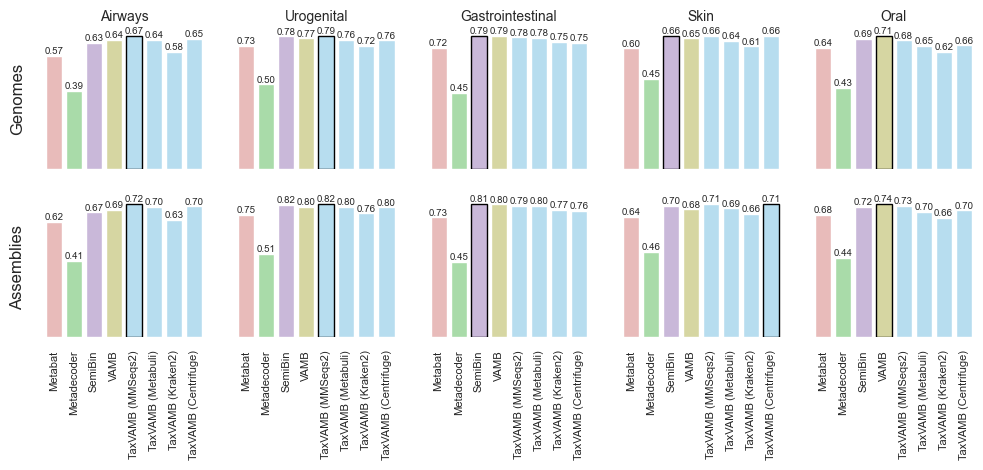

In [28]:
sns.set_theme(style="whitegrid")

df_final = df[df['Tool_reclustering'].isin(with_reclustering)].copy()
df_final['labels'] = df_final['Tool_reclustering'].map(label_map)
df_final['Dataset'] = df_final['sample']

f, axs = plt.subplots(2, 5, figsize=(12, 4), sharex=True, sharey=False)

taxvamb_colors = ['#ade1f9']*4
colors = ['#f0b3b2', '#a1e3a1', '#c9b3de', '#dedf99'] + taxvamb_colors

map_labels = {
    False: 'Genomes',
    True: 'Assemblies',
}

for j, s in enumerate(['Airways', 'Urogenital', 'Gastrointestinal', 'Skin', 'Oral']):
    df_s = df_final[df_final['Dataset'] == s]
    sns.set_color_codes("pastel")
    sns.despine(left=True, bottom=True)
    for i, Y in enumerate([False, True]):
        if Y:
            df_sk = df_s[df_s['ASSEMBLY']]
        else:
            df_sk = df_s[~df_s['ASSEMBLY']]
        
        ax = axs[i][j]
        g = sns.barplot(
            x="labels", 
            y='Mean bin F1', 
            data=df_sk, 
            hue='labels', 
            palette=colors, 
            orient='v', 
            hue_order=label_map_values, 
            order=label_map_values, 
            ax=ax, 
            legend=False,
        )

        heights = []
        for bars in ax.containers:
            ax.bar_label(bars, label_type='edge', fmt='{:.2f}', size=7)
            for _, bar in enumerate(bars):
                heights.append(bar.get_height())

        if not np.all(np.isnan(np.array(heights))):
            tallest = np.max(np.array(heights))
            for m, height in enumerate(heights):
                if height == tallest:
                    ax.containers[m].patches[0].set_edgecolor('black')
                
        ax.set_xlabel('')
        if j != 0:
            ax.set_ylabel('')
        else:
            ax.set_ylabel(map_labels[Y], fontsize=12)
        if i == 0:
            ax.set_title(s, fontsize=10)
        ax.grid(False)

    
for j in range(10):
    ax = axs.flat[j]
    ax.tick_params(axis='x', rotation=90)
    ax.set_yticklabels([])
    ax.set_xticks(list(range(len(label_map_values))))
    ax.set_xticklabels(label_map_values, size=8)


plt.savefig(f'../figures/supfigure_f1_score.pdf', bbox_inches = 'tight')
plt.show()

# Supplementary Figure S7

In [9]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 7')

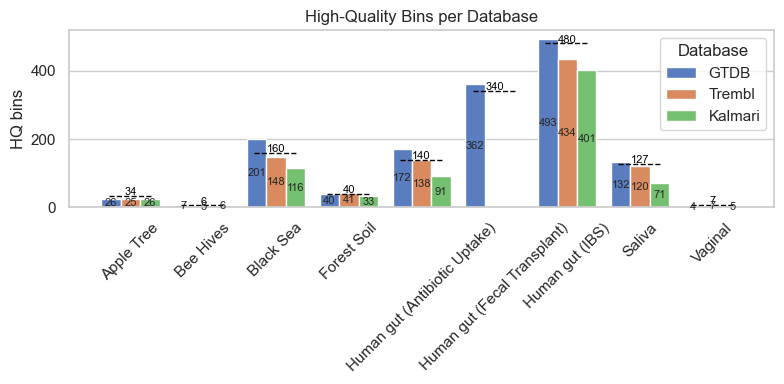

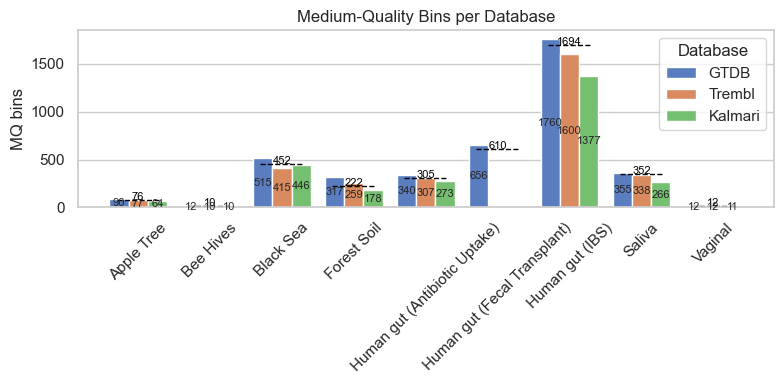

In [10]:
dataset_label_map = {
    'PRJNA638805': 'Black Sea',
    'PRJNA1003562': 'Apple Tree',
    'PRJNA783873': 'Forest Soil',
    'bee_metagenome_PRJNA1007366': 'Bee Hives',
    'vag_infert_PRJNA1078345': 'Vaginal',
    'human_saliva_oral_PRJDB16210': 'Saliva',
    'gut': 'Human gut (Fecal Transplant)',
    'data_ar': 'Human gut (Antibiotic Uptake)',
    'erda': 'Human gut (IBS)',
}

tool_label_map = {
    'kalmari_taxvamb_default': 'Kalmari',
    'trembl_taxvamb_default': 'Trembl',
    'run_taxvamb_gtdb_w_unknown': 'GTDB',
}

# Map labels
df['DatasetLabel'] = df['Sample'].map(dataset_label_map)
df['ToolLabel'] = df['tool'].map(tool_label_map)

# Separate default_vamb and other tools
df_vamb = df[df['tool'] == 'default_vamb']
df_other = df[df['tool'].isin(tool_label_map)]

# Aggregate best per dataset+tool
df_other_best = df_other.groupby(['DatasetLabel', 'ToolLabel'], as_index=False)[['HQ_bins', 'MQ_bins']].max()

# Melt for plotting
df_other_melt = df_other_best.melt(
    id_vars=['DatasetLabel', 'ToolLabel'],
    value_vars=['HQ_bins', 'MQ_bins'],
    var_name='BinQuality',
    value_name='Count'
)
df_vamb_melt = df_vamb.melt(
    id_vars=['DatasetLabel'],
    value_vars=['HQ_bins', 'MQ_bins'],
    var_name='BinQuality',
    value_name='VAMB_Count'
)

# --- Plot HQ ---
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(8, 4))
hq_data = df_other_melt[df_other_melt['BinQuality'] == 'HQ_bins']
plot = sns.barplot(
    data=hq_data,
    x='DatasetLabel',
    y='Count',
    hue='ToolLabel',
    hue_order=['GTDB', 'Trembl', 'Kalmari'],
    palette='muted',
    ax=ax1
)

ax1.set_title("High-Quality Bins per Database")
ax1.set_ylabel("HQ bins")
ax1.set_xlabel("")
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Database')

# Add horizontal lines per dataset (HQ)
xticks = ax1.get_xticks()
xticklabels = [tick.get_text() for tick in ax1.get_xticklabels()]
width = 0.3  # Approximate width of one bar group

for tick, dataset in zip(xticks, xticklabels):
    row = df_vamb[df_vamb['DatasetLabel'] == dataset]
    if not row.empty:
        hq = row['HQ_bins'].values[0]
        ax1.hlines(y=hq, xmin=tick - width, xmax=tick + width, color='black', linestyle='--', linewidth=1)
        ax1.text(x=tick, y=hq + 2, s=f'{hq}', ha='center', fontsize=8, color='black')

# Add bar labels
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fontsize=8)

plt.tight_layout()
plt.savefig(f'../figures/supfigure_mmseqs_dataases_4a.pdf', bbox_inches='tight')
plt.show()

# --- MQ plot ---
fig, ax2 = plt.subplots(figsize=(8, 4))
mq_data = df_other_melt[df_other_melt['BinQuality'] == 'MQ_bins']
plot = sns.barplot(
    data=mq_data,
    x='DatasetLabel',
    y='Count',
    hue='ToolLabel',
    hue_order=['GTDB', 'Trembl', 'Kalmari'],
    palette='muted',
    ax=ax2
)

ax2.set_title("Medium-Quality Bins per Database")
ax2.set_ylabel("MQ bins")
ax2.set_xlabel("")
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Database')

# Add horizontal lines per dataset (MQ)
xticks = ax2.get_xticks()
xticklabels = [tick.get_text() for tick in ax2.get_xticklabels()]

for tick, dataset in zip(xticks, xticklabels):
    row = df_vamb[df_vamb['DatasetLabel'] == dataset]
    if not row.empty:
        mq = row['MQ_bins'].values[0]
        ax2.hlines(y=mq, xmin=tick - width, xmax=tick + width, color='black', linestyle='--', linewidth=1)
        ax2.text(x=tick, y=mq + 2, s=f'{mq}', ha='center', fontsize=8, color='black')

# Add bar labels
for container in ax2.containers:
    ax2.bar_label(container, label_type='center', fontsize=8)

plt.tight_layout()
plt.savefig(f'../figures/supfigure_mmseqs_dataases_4b.pdf', bbox_inches='tight')
plt.show()


# Supplementary Figure S5

In [132]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 5-6')
keep = ['Metabat', 'Metadecoder', 'Comebin', 'Comebin (Single)', 'SemiBin2', 'VAMB', 'TaxVAMB', 
        'TaxVAMB (no reclustering)', 'VAMB (no reclustering)']
df = df[df["Method"].isin(keep)]

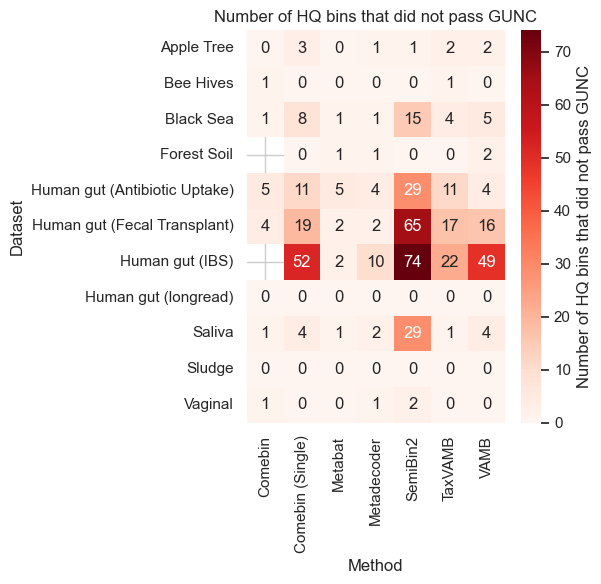

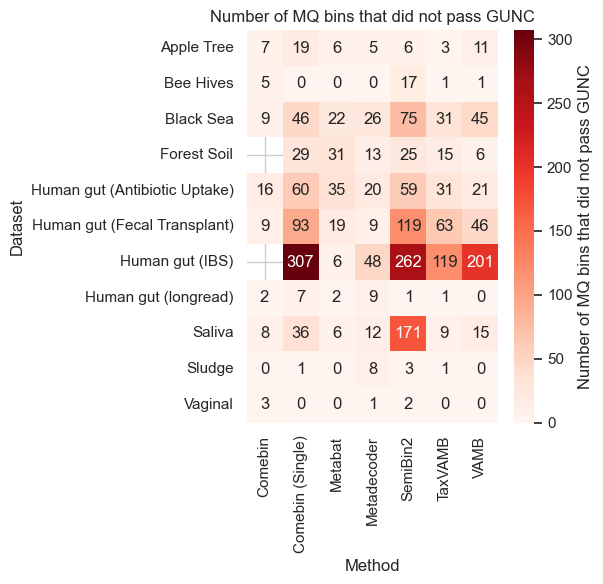

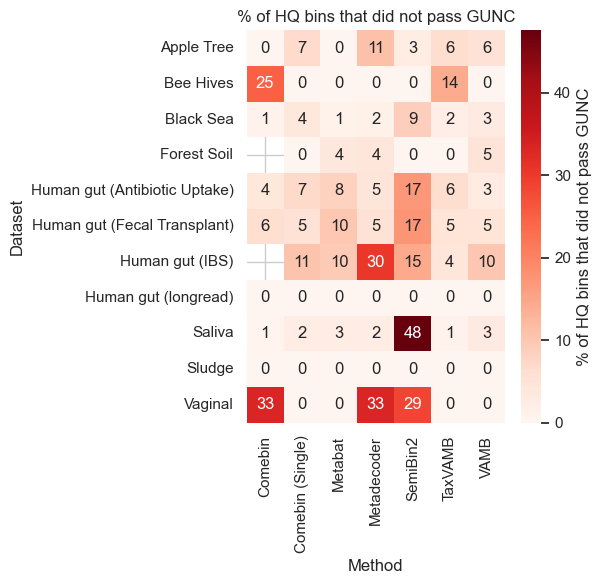

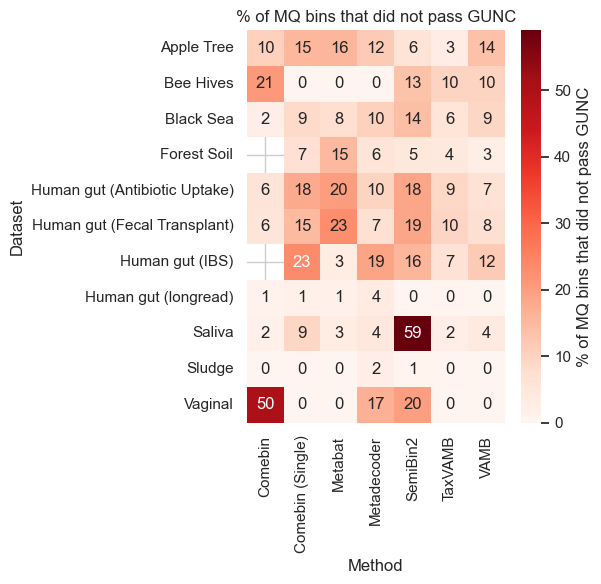

In [108]:
df.columns = df.columns.str.strip()

for c in ["HQ", "MQ", "HQ_GUNC", "MQ_GUNC"]:
    df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0).astype(int)

# --- aggregate across duplicates: Dataset × Method ---
agg = (df.groupby(["Dataset", "Method"], as_index=False)
         .sum(numeric_only=True))

# compute absolute and relative drops
agg["Number of HQ bins that did not pass GUNC"] = agg["HQ"] - agg["HQ_GUNC"]
agg["Number of MQ bins that did not pass GUNC"] = agg["MQ"] - agg["MQ_GUNC"]
agg["% of HQ bins that did not pass GUNC"] = (agg["Number of HQ bins that did not pass GUNC"] / agg["HQ"].replace(0, pd.NA) * 100).fillna(0)
agg["% of MQ bins that did not pass GUNC"] = (agg["Number of MQ bins that did not pass GUNC"] / agg["MQ"].replace(0, pd.NA) * 100).fillna(0)

# --- Pivot for heatmap ---
def plot_heatmap(metric, outfile, cmap="Reds"):
    pivot = agg.pivot(index="Dataset", columns="Method", values=metric)
    plt.figure(figsize=(6, 6))
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap=cmap, cbar_kws={"label": metric})
    plt.title(f"{metric}")
    plt.ylabel("Dataset")
    plt.xlabel("Method")
    plt.tight_layout()
    plt.savefig(outfile, dpi=300)
    # plt.close()

# absolute drops
plot_heatmap("Number of HQ bins that did not pass GUNC", "../figures/supfigure_GUNC_hq.pdf", cmap="Reds")
plot_heatmap("Number of MQ bins that did not pass GUNC", "../figures/supfigure_GUNC_mq.pdf", cmap="Reds")

# relative drops
plot_heatmap("% of HQ bins that did not pass GUNC", "../figures/supfigure_GUNC_hq_rel.pdf", cmap="Reds")
plot_heatmap("% of MQ bins that did not pass GUNC", "../figures/supfigure_GUNC_mq_rel.pdf", cmap="Reds")

# Figure 3a

In [148]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 5-6')
keep = ['Metabat', 'Metadecoder', 'Comebin', 'Comebin (Single)', 'SemiBin2', 'VAMB', 'TaxVAMB', 
        'TaxVAMB (no reclustering)', 'VAMB (no reclustering)']
df = df[df["Method"].isin(keep)]

/var/folders/5b/1dk8bnws25l6w502hfdc8xw80000gn/T/ipykernel_74958/3845741912.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ToolLabel"] = df2["Method"]


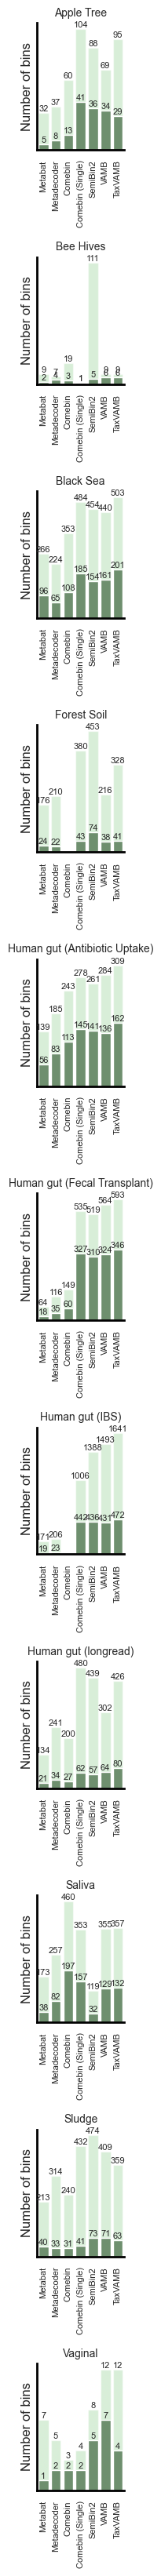

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

keep = ['Metabat', 'Metadecoder', 'Comebin', 'Comebin (Single)', 'SemiBin2', 'VAMB', 'TaxVAMB']
df2 = df[df["Method"].isin(keep)]


# If you prefer GUNC-filtered counts, swap HQ/MQ below
hq_column = "HQ_GUNC"   # or "HQ_GUNC"
mq_column = "MQ_GUNC"   # or "MQ_GUNC"

df2["ToolLabel"] = df2["Method"]

# long format like in your other script
df_m = df2.melt(
    id_vars=["Dataset", "ToolLabel"],
    value_vars=[hq_column, mq_column],
    var_name="Quality",
    value_name="Count"
)
df_m["Quality"] = df_m["Quality"].map({
    hq_column: "High Quality",
    mq_column: "Medium Quality"
})

datasets = sorted(df_m["Dataset"].unique())
order_labels = keep
df_m["ToolLabel"] = pd.Categorical(df_m["ToolLabel"],
                                   categories=order_labels,
                                   ordered=True)

# -------------------------------------------------
# 2) Colors – light/dark greens (same as before)
# -------------------------------------------------
light_green = "#a1e3a1"
dark_green  = "#699469"
light_palette = [light_green] * len(order_labels)
dark_palette  = [dark_green] * len(order_labels)

# -------------------------------------------------
# 3) Figure: one narrow panel per dataset
# -------------------------------------------------

n_rows = len(datasets)
fig, axs = plt.subplots(
    n_rows, 1,
    figsize=(1.7, 3 * n_rows),
    sharex=False, sharey=False
)

if n_rows == 1:
    axs = [axs]

for j, s in enumerate(datasets):
    ax = axs[j]
    df_s = df_m[df_m["Dataset"] == s]

    # MQ (background, lighter, semi-transparent)
    df_mq = df_s[df_s["Quality"] == "Medium Quality"]
    if not df_mq.empty:
        sns.barplot(
            data=df_mq,
            x="ToolLabel", y="Count",
            order=order_labels,
            hue="ToolLabel", hue_order=order_labels,
            palette=light_palette,
            dodge=False,
            ax=ax,
        )
        # make them slightly transparent
        for p in ax.patches[-len(order_labels):]:
            p.set_alpha(0.45)
        if ax.legend_:
            ax.legend_.remove()

    # HQ (foreground, darker)
    df_hq = df_s[df_s["Quality"] == "High Quality"]
    if not df_hq.empty:
        sns.barplot(
            data=df_hq,
            x="ToolLabel", y="Count",
            order=order_labels,
            hue="ToolLabel", hue_order=order_labels,
            palette=dark_palette,
            dodge=False,
            ax=ax,
        )
        if ax.legend_:
            ax.legend_.remove()

    # Bar labels (like in your existing script)
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', size=8)

    # Cosmetics: match your style
    ax.set_xlabel("")
    ax.set_ylabel("Number of bins")
    ax.set_title(s, fontsize=10)
    ax.tick_params(axis='x', labelrotation=90, labelsize=8)

    # Remove y-ticks and make fat black axes
    ax.tick_params(axis='y', left=False, labelleft=False)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(2.0)
        ax.spines[spine].set_color("black")
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    ax.grid(False)

plt.tight_layout()
plt.savefig("../figures/apple_tree_semibin_taxvamb.pdf", bbox_inches="tight")
plt.show()

# Supplementary Figure S6

In [150]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 5-6')
keep = ['Metabat', 'Metadecoder', 'Comebin', 'Comebin (Single)', 'SemiBin2', 'VAMB', 'TaxVAMB', 
        'TaxVAMB (no reclustering)', 'VAMB (no reclustering)']
df = df[df["Method"].isin(keep)]

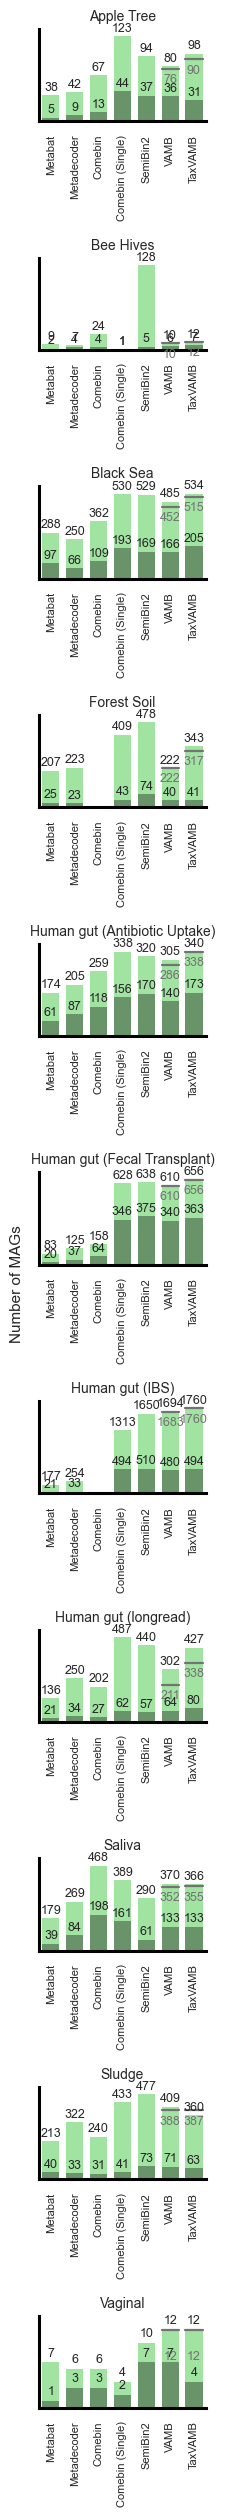

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Methods shown as bars (no "no reclustering" here)
# -----------------------------
bars = ['Metabat', 'Metadecoder', 'Comebin', 'Comebin (Single)', 'SemiBin2', 'VAMB', 'TaxVAMB']

# Overlay-line methods (drawn on top of specific bars)
overlay_specs = [
    # (method_to_read_value_from, bar_to_draw_line_over)
    ("VAMB (no reclustering)", "VAMB"),
    ("TaxVAMB (no reclustering)", "TaxVAMB"),
]

hq_column = "HQ"    # or "HQ_GUNC"
mq_column = "MQ"    # or "MQ_GUNC"

# -----------------------------
# Split data
# -----------------------------
df_bars = df[df["Method"].isin(bars)].copy()
df_overlay = df[df["Method"].isin([m for m, _ in overlay_specs])].copy()

datasets = sorted(df_bars["Dataset"].unique())

# Colors
dark_green  = "#699469"
light_green = "#a1e3a1"
grey_line   = "0.45"

width = 0.72

n_rows = len(datasets)
fig, axs = plt.subplots(
    n_rows, 1,
    figsize=(2.2, 2.35 * n_rows),
    sharex=False, sharey=False
)
if n_rows == 1:
    axs = [axs]

for ax, ds in zip(axs, datasets):
    sub = df_bars[df_bars["Dataset"] == ds].set_index("Method")

    x = np.arange(len(bars))
    hq = np.array([sub.loc[m, hq_column] if m in sub.index else 0 for m in bars], dtype=float)
    mq = np.array([sub.loc[m, mq_column] if m in sub.index else 0 for m in bars], dtype=float)

    # Paper-style stacks: HQ subset inside MQ total
    mq_only = np.maximum(mq - hq, 0)

    # -----------------------------
    # Determine panel y-scale FIRST (so labels won't clip)
    # -----------------------------
    overlay_vals_for_scale = []
    for method_value, _ in overlay_specs:
        row = df_overlay[
            (df_overlay["Dataset"] == ds) &
            (df_overlay["Method"] == method_value)
        ]
        if not row.empty:
            overlay_vals_for_scale.append(float(row.iloc[0][mq_column]))

    max_bar = float(np.max(mq)) if len(mq) else 1.0
    max_ref = float(np.max(overlay_vals_for_scale)) if overlay_vals_for_scale else 0.0
    panel_max = max(max_bar, max_ref, 1.0)

    # Padding used for text placement and ylim headroom
    y_text_pad = max(1.0, 0.04 * panel_max)

    # -----------------------------
    # Bars
    # -----------------------------
    ax.bar(x, hq, width=width, color=dark_green, linewidth=0)
    ax.bar(x, mq_only, bottom=hq, width=width, color=light_green, linewidth=0)

    # -----------------------------
    # Overlay short grey lines + labels (no reclustering)
    # -----------------------------
    overlay_vals_seen = []
    for method_value, bar_target in overlay_specs:
        row = df_overlay[
            (df_overlay["Dataset"] == ds) &
            (df_overlay["Method"] == method_value)
        ]
        if not row.empty and bar_target in bars:
            y_line = float(row.iloc[0][mq_column])
            overlay_vals_seen.append(y_line)

            idx = bars.index(bar_target)
            x_center = x[idx]
            x0 = x_center - width / 2
            x1 = x_center + width / 2

            # grey cap
            ax.plot([x0, x1], [y_line, y_line], color=grey_line, linewidth=1.6)

            # numeric label for the no-reclustering value
            ax.text(
                x_center,
                y_line - 5*y_text_pad,
                f"{int(y_line)}",
                ha="center",
                va="bottom",
                fontsize=9,
                color=grey_line
            )

    # -----------------------------
    # Annotate totals (MQ totals) above bars
    # -----------------------------
    for i, total in enumerate(mq):
        if total > 0:
            ax.text(
                i,
                total + 0.5*y_text_pad,
                f"{int(total)}",
                ha="center",
                va="bottom",
                fontsize=9
            )
    for i, total in enumerate(hq):
        if total > 0:
            ax.text(
                i,
                total + 0.5*y_text_pad,
                f"{int(total)}",
                ha="center",
                va="bottom",
                fontsize=9
            )
    # -----------------------------
    # Axis / cosmetics
    # -----------------------------
    ax.set_title(ds, fontsize=10, pad=6)

    ax.set_xticks(x)
    ax.set_xticklabels(bars, rotation=90, ha="center", fontsize=8)

    # Headroom includes label padding so nothing clips
    ax.set_ylim(0, panel_max + 2.2 * y_text_pad)
    ax.set_xlim(-0.5, len(bars) - 0.5)

    ax.tick_params(axis='y', left=False, labelleft=False)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(2.2)
        ax.spines[spine].set_color("black")
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    ax.grid(False)

fig.text(0.02, 0.5, "Number of MAGs", va="center", rotation="vertical", fontsize=11)

plt.tight_layout(rect=[0.07, 0.02, 1, 1])
plt.savefig("../figures/shortread_panels.pdf", bbox_inches="tight")
plt.show()


# Supplementary Figure S4

In [33]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 4')

In [34]:
# Normalize column names and values
df = df.rename(columns={"Type": "Method", "Genomes": "Genomes", "Assemblies": "Assemblies", "Dataset": "Dataset", "Taxometer": "Taxometer"})
df["Taxometer"] = df["Taxometer"].fillna("N/A")
df["Method"] = df["Method"].str.capitalize()
df["Method"] = df["Method"].replace({"Labels": "Taxonomy", "Vamb": "VAMB", "Taxvamb": "TaxVAMB", "Stacked": "Stacked"})

# Filtered datasets
df_plot1 = df[((df["Method"].isin(["TaxVAMB", "Stacked", "Taxonomy"])) & (df["Taxometer"] == "Yes")) | (df["Method"] == "VAMB")].copy()
df_plot2 = df[df["Method"].isin(["TaxVAMB", "Stacked", "Taxonomy"])].copy()

dataset_order = ['Airways', 'Urogenital', 'Gastrointestinal', 'Skin', 'Oral']

size = (7, 2.8)

# Plot 1: TaxVAMB vs VAMB vs Labels (Taxometer == Yes), combined
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1, 5, figsize=size, sharey=True)
method_order = ["TaxVAMB", "Stacked", "VAMB", "Taxonomy"]
for i, dataset in enumerate(dataset_order):
    ax = axs[i]
    df_s = df_plot1[df_plot1["Dataset"] == dataset]
    sns.barplot(data=df_s, x="Method", y="Assemblies", ax=ax, order=method_order, color="#fcbba1")
    for bars in ax.containers:
        ax.bar_label(bars, label_type='edge', size=8)
    ax.set_title(dataset, fontsize=10)
    ax.set_xlabel('')
    ax.set_xticks(range(len(method_order)))
    ax.set_xticklabels(method_order, rotation=45, size=8)
    if i == 0:
        ax.set_ylabel("Assemblies", fontsize=12)
    else:
        ax.set_ylabel("")
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Taxometer", loc='center right', bbox_to_anchor=(1.1, 0.5))
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.savefig('../figures/supfigure_ablation_1.pdf', bbox_inches = 'tight')
plt.close()

# Plot 2: TaxVAMB and Labels with/without Taxometer, combined
fig, axs = plt.subplots(1, 5, figsize=size, sharey=True)
method_order = ["TaxVAMB", "Stacked", "Taxonomy"]
taxometer_order = ["Yes", "No", "N/A"]
palette = {"Yes": "#fcbba1", "No": "#c6dbef", "N/A": "#d9d9d9"}
for i, dataset in enumerate(dataset_order):
    ax = axs[i]
    df_s = df_plot2[df_plot2["Dataset"] == dataset]
    sns.barplot(data=df_s, x="Method", y="Assemblies", hue="Taxometer",
                hue_order=taxometer_order, order=method_order, ax=ax, palette=palette)
    for bars in ax.containers:
        ax.bar_label(bars, label_type='edge', size=8)
    ax.set_title(dataset, fontsize=10)
    ax.set_xlabel('')
    ax.set_xticks(range(len(method_order)))
    ax.set_xticklabels(method_order, rotation=45, ha='right', size=8)
    ax.get_legend().remove()
    if i == 0:
        ax.set_ylabel("Assemblies", fontsize=12)
    else:
        ax.set_ylabel("")

# Global legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Taxometer", loc='center right', bbox_to_anchor=(1.1, 0.5))
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.savefig('../figures/supfigure_ablation_2.pdf', bbox_inches = 'tight')
plt.close()

In [35]:
fig, axs = plt.subplots(1, 5, figsize=size, sharey=True)
method_order = ["TaxVAMB", "Stacked", "VAMB", "Taxonomy"]
for i, dataset in enumerate(dataset_order):
    ax = axs[i]
    df_s = df_plot1[df_plot1["Dataset"] == dataset]
    sns.barplot(data=df_s, x="Method", y="Genomes", ax=ax, order=method_order, color="#fcbba1")
    for bars in ax.containers:
        ax.bar_label(bars, label_type='edge', size=8)
    ax.set_title(dataset, fontsize=10)
    ax.set_xlabel('')
    ax.set_xticks(range(len(method_order)))
    ax.set_xticklabels(method_order, rotation=45, size=8)
    if i == 0:
        ax.set_ylabel("Genomes", fontsize=12)
    else:
        ax.set_ylabel("")
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Taxometer", loc='center right', bbox_to_anchor=(1.1, 0.5))
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.savefig('../figures/supfigure_ablation_3.pdf', bbox_inches = 'tight')
plt.close()

# Plot 2: TaxVAMB and Labels with/without Taxometer, combined
fig, axs = plt.subplots(1, 5, figsize=size, sharey=True)
method_order = ["TaxVAMB", "Stacked", "Taxonomy"]
taxometer_order = ["Yes", "No", "N/A"]
palette = {"Yes": "#fcbba1", "No": "#c6dbef", "N/A": "#d9d9d9"}
for i, dataset in enumerate(dataset_order):
    ax = axs[i]
    df_s = df_plot2[df_plot2["Dataset"] == dataset]
    sns.barplot(data=df_s, x="Method", y="Genomes", hue="Taxometer",
                hue_order=taxometer_order, order=method_order, ax=ax, palette=palette)
    for bars in ax.containers:
        ax.bar_label(bars, label_type='edge', size=8)
    ax.set_title(dataset, fontsize=10)
    ax.set_xlabel('')
    ax.set_xticks(range(len(method_order)))
    ax.set_xticklabels(method_order, rotation=45, ha='right', size=8)
    ax.get_legend().remove()
    if i == 0:
        ax.set_ylabel("Genomes", fontsize=12)
    else:
        ax.set_ylabel("")

# Global legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Taxometer", loc='center right', bbox_to_anchor=(1.1, 0.5))
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.savefig('../figures/supfigure_ablation_4.pdf', bbox_inches = 'tight')
plt.close()

# Supplementary Figure S10

In [138]:
df_res_all2 = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 10b')
df_res_all2 = df_res_all2.fillna('')
df_res_all2['text'] = df_res_all2['text'].map(lambda x: '' if not x else f'{x*100:.0f}%')
df_res_all2.loc[df_res_all2['metric'] != '1) true', 'text'] = ''
df_res_all2['model'] = df_res_all2['model'].map({
    'gtdbtk': 'GTDBtk',
    'taxvamb': 'TaxVAMB',
})

In [139]:
levels = ['d', 'p', 'c', 'o', 'f', 'g', 's']
charts = []
# for i, s in enumerate(['airways', 'skin', 'oral', 'urog', 'gi']):
df = df_res_all2[(df_res_all2['taxonomy'] == 's')]
dataset_order = ['airways', 'skin', 'oral', 'urog', 'gi']

chart = alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('model:N', title=None, sort=['GTDBtk', 'TaxVAMB']),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(value):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
#         column=alt.Column('taxonomy:N', title=None, sort=levels),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'metric',
      sort='ascending'
    ),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('metric:N',
            scale=alt.Scale(
                range=['#67a9cf', '#b31f2c', '#faae61'
                      ],
            ),
        ))



text=alt.Chart(df).mark_text(
#         align='center',
    baseline='top',
    dx=0, dy=5,
).encode(
    y=alt.Y('sum(value)',  stack='zero'),
    x=alt.X('model:N', sort=['gtdbtk', 'taxvamb']),
    text=alt.Text('text'),
        order=alt.Order(
      # Sort the segments of the bars by this field
      'metric',
      sort='ascending'
    ),
)


chart_text = (chart + text).facet(
    column=alt.Column('dataset:N', title=None, sort=dataset_order),

)
chart_text = chart_text.configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0
    )

charts.append(chart_text)



In [140]:
charts[0]

alt.FacetChart(...)

# Supplementary Figure S11a

In [141]:
df_res_all2 = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 11a')
df_res_all2 = df_res_all2.fillna('')
df_res_all2['model'] = df_res_all2['model'].map({
    'gtdbtk': 'GTDBtk',
    'taxvamb': 'TaxVAMB',
})

In [142]:
levels = ['d', 'p', 'c', 'o', 'f', 'g', 's']
charts = []
# for i, s in enumerate(['airways', 'skin', 'oral', 'urog', 'gi']):
df = df_res_all2[(df_res_all2['taxonomy'] == 's')]
dataset_order = ['airways', 'skin', 'oral', 'urog', 'gi']

chart = alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('model:N', title=None, sort=['gtdbtk', 'taxvamb']),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(value):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
#         column=alt.Column('taxonomy:N', title=None, sort=levels),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'metric',
      sort='ascending'
    ),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('metric:N',
            scale=alt.Scale(
                range=['#67a9cf', '#b31f2c', '#faae61'
                      ],
            ),
        ))



text=alt.Chart(df).mark_text(
#         align='center',
    baseline='top',
    dx=0, dy=5,
).encode(
    y=alt.Y('sum(value)',  stack='zero'),
    x=alt.X('model:N', sort=['mmseqs']),
    text=alt.Text('text'),
        order=alt.Order(
      # Sort the segments of the bars by this field
      'metric',
      sort='ascending'
    ),
)


chart_text = (chart + text).facet(
    column=alt.Column('dataset:N', title=None, sort=dataset_order),

)
chart_text = chart_text.configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0
    )

charts.append(chart_text)



In [143]:
charts[0]

alt.FacetChart(...)

# Supplementary Figure 11b

In [144]:
df_res_all2 = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 11b')
df_res_all2 = df_res_all2.fillna('')
df_res_all2['model'] = df_res_all2['model'].map({
    'gtdbtk_vamb': 'GTDBtk',
    'vamb': 'VAMB',
})

In [145]:
levels = ['d', 'p', 'c', 'o', 'f', 'g', 's']
charts = []
# for i, s in enumerate(['airways', 'skin', 'oral', 'urog', 'gi']):
df = df_res_all2[(df_res_all2['taxonomy'] == 's')]
dataset_order = ['airways', 'skin', 'oral', 'urog', 'gi']

chart = alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('model:N', title=None, sort=['gtdbtk_vamb', 'vamb']),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(value):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
#         column=alt.Column('taxonomy:N', title=None, sort=levels),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'metric',
      sort='ascending'
    ),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('metric:N',
            scale=alt.Scale(
                range=['#67a9cf', '#b31f2c', '#faae61'
                      ],
            ),
        ))



text=alt.Chart(df).mark_text(
#         align='center',
    baseline='top',
    dx=0, dy=5,
).encode(
    y=alt.Y('sum(value)',  stack='zero'),
    x=alt.X('model:N', sort=['gtdbtk_vamb', 'vamb']),
    text=alt.Text('text'),
        order=alt.Order(
      # Sort the segments of the bars by this field
      'metric',
      sort='ascending'
    ),
)


chart_text = (chart + text).facet(
    column=alt.Column('dataset:N', title=None, sort=dataset_order),

)
chart_text = chart_text.configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0
    )

charts.append(chart_text)



In [146]:
charts[0]

alt.FacetChart(...)